---

# <center>Edge Detection and Segmentation</center>

---

## ⚙️ 1. ENVIRONMENT SETTINGS

### 1.1 Instalação de Pacotes

In [1]:
# watermark: Exibe informações como versões de pacotes e hardware. Útil para a reproducibilidade.
# !pip install -q -U watermark

# opencv-python: Usada em processamento de imagens e visão computacional.
# !pip install -q -U opencv-python

# opencv-contrib-python: Inclui funcionalidades extras e módulos experimentais para o OpenCV.
# !pip install -q -U opencv-contrib-python

### 1.2 Carga de Pacotes

In [2]:
# Configuração do ambiente de desenvolvimento.
import os  
import warnings

# Processamento de imagens e visão computacional.
import cv2 as cv  

# Math & Algebra
import numpy as np

# Visualização de dados e imagens.
from PIL import Image  
import imageio.v2 as imageio  
import matplotlib.pyplot as plt 
from IPython.display import display

# Configuração de avisos.
warnings.filterwarnings('ignore')

### 1.3 Configurações da Máquina

In [3]:
# Carregamento e uso da extensão watermark no Jupyter Notebook.
%reload_ext watermark  
%watermark -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-92-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



## 🔋 2. CARREGANDO E VISUALIZANDO IMAGEM ORIGINAL

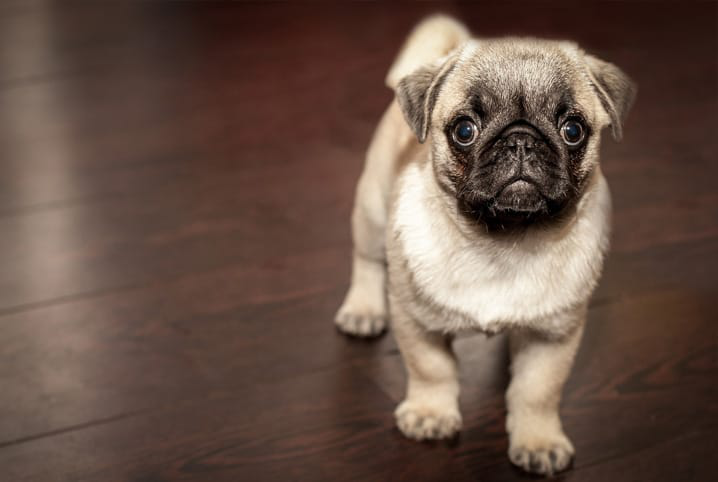

In [4]:
# Carregamento de uma imagem.
img_original = imageio.imread("images/cachorro.jpg")

# Visualização da imagem.
display(Image.open("images/cachorro.jpg"))

## 🔎 3. DETECÇÃO DE BORDAS

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">A Detecção de Bordas foca em identificar os pontos em uma imagem digital onde o brilho ou a intensidade da imagem muda significativamente ou, mais formalmente, torna-se descontínua. As bordas em uma imagem indicam transições e mudanças abruptas nas intensidades de pixel e são fundamentais para compreender características da imagem, como formas, contornos e texturas.</p>

### 3.1 Método Canny

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">
O <strong>Detector de Bordas de Canny</strong> é conhecido por sua alta eficiência na detecção de bordas finas e robustez na supressão de ruídos. Este algoritmo multiestágio é amplamente utilizado devido à sua capacidade de destacar bordas significativas, mantendo a precisão. No entanto, uma limitação do método de Canny é a sensibilidade às variações de ruído e seu custo computacional relativamente alto.
</p>

In [5]:
def edge_segmentation(img_original):
    
    # De RGB -> Gray
    gray_img = cv.cvtColor(img_original, cv.COLOR_RGB2GRAY)
    
    # Obtendo os limiares do Threshold
    l_inferior = int(max(0, (1 - 0.33) * np.median(img_original.flatten())))
    l_superior = int(min(255, (1 + 0.33) * np.median(img_original.flatten())))
    
    # Aplicando a detecção de bordas de Canny
    img_canny = cv.Canny(gray_img, l_inferior, l_superior)
    
    # Retornando a imagem segmentada
    return img_canny
bordas = edge_segmentation(img_original)

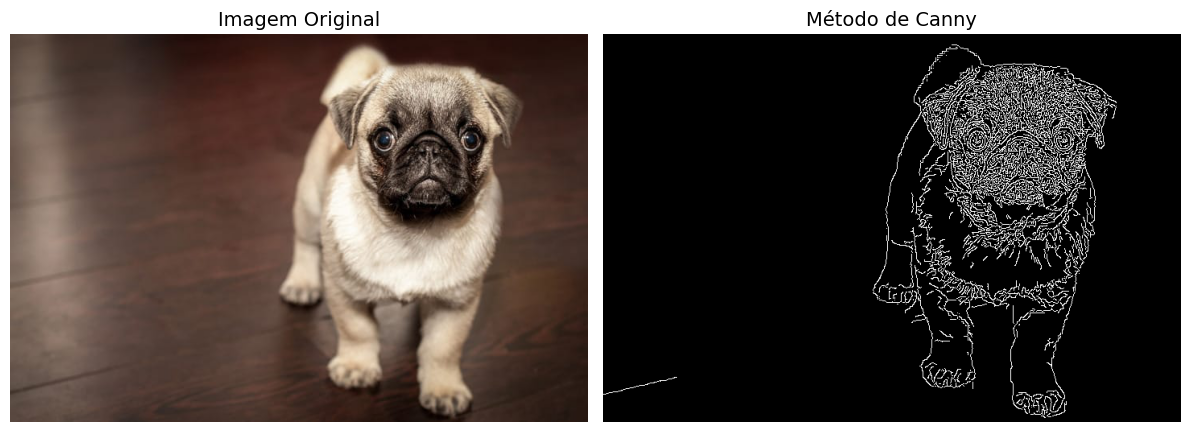

In [13]:
def plot_results(img_original, method, title_method="Método de Canny", src="canny"):
    """
    Função para plotar a imagem original e o resultado da detecção de bordas pelo método de Canny.

    Parâmetros:
    - img_original: Imagem original em formato compatível com matplotlib (geralmente um array numpy).
    - bordas: Imagem resultante da aplicação do método de Canny.
    - title_original: Título a ser exibido sobre a imagem original.
    - title_canny: Título a ser exibido sobre a imagem resultante da aplicação do método de Canny.
    """

    # Configura o tamanho e layout da figura
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Ajusta espaço entre as imagens
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    # Plotagem da imagem original
    ax[0].imshow(img_original)
    ax[0].set_title("Imagem Original", fontsize=14)
    ax[0].axis("off")  # Remove os eixos

    # Plotagem da imagem com bordas detectadas
    ax[1].imshow(method, cmap="gray")
    ax[1].set_title(title_method, fontsize=14)
    ax[1].axis("off")  # Remove os eixos

    # Melhora a distribuição dos plots
    plt.tight_layout()

    # Exibe a figura
    plt.savefig(f'images/{src}.png', dpi=300, format='png', bbox_inches='tight')
    plt.show()
plot_results(img_original, bordas)

## 🖌 4. Segmentação

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">A Segmentação visa dividir uma imagem em regiões que compartilham características semelhantes, como cor, intensidade ou textura. Este processo facilita a identificação de objetos e limites na imagem, sendo fundamental em diversas aplicações de análise de imagens.</p>

### 4.1 Método de Segmentação Baseada em Limiarização (Thresholding) + Otsu

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">O <strong>Método de Segmentação Baseada em Limiarização</strong>, conhecido como Thresholding, é uma técnica de segmentação de imagens caracterizada por sua simplicidade e rapidez. Ela opera definindo um valor de limiar, que serve para segmentar a imagem em diferentes partes com base nesse critério. <strong><i>Pontos fortes:</i></strong> Este método é particularmente eficaz em imagens com alto contraste, graças à sua implementação direta e eficiente. <strong><i>Pontos fracos:</i></strong> No entanto, enfrenta limitações quando aplicado a imagens que apresentam variações sutis de intensidade ou iluminação não uniforme, onde sua eficiência pode ser significativamente reduzida.</p>

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">Uma evolução significativa do método tradicional de thresholding é o uso do <strong>Método de Otsu</strong>, que busca otimizar a segmentação automaticamente. Diferentemente do thresholding convencional, que requer a definição manual de um valor de limiar, o Método de Otsu calcula este valor de forma automática. Ele funciona analisando o histograma da imagem e escolhendo um valor que minimiza a variação intraclasse, sendo especialmente eficaz em imagens com distribuição bimodal de intensidade. Esse método torna o processo de segmentação mais robusto e menos suscetível a variações de iluminação ou contraste.</p>

In [14]:
def otsu_segmentation(img_original):
    
    # De RGB -> Gray
    gray_img = cv.cvtColor(img_original, cv.COLOR_RGB2GRAY)
    
    # Aplicando o método de segmentação baseado em limiarização e Otsu
    img_segmentation = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    
    # Retornando a imagem segmentada
    return img_segmentation[1]
segmentation = otsu_segmentation(img_original)

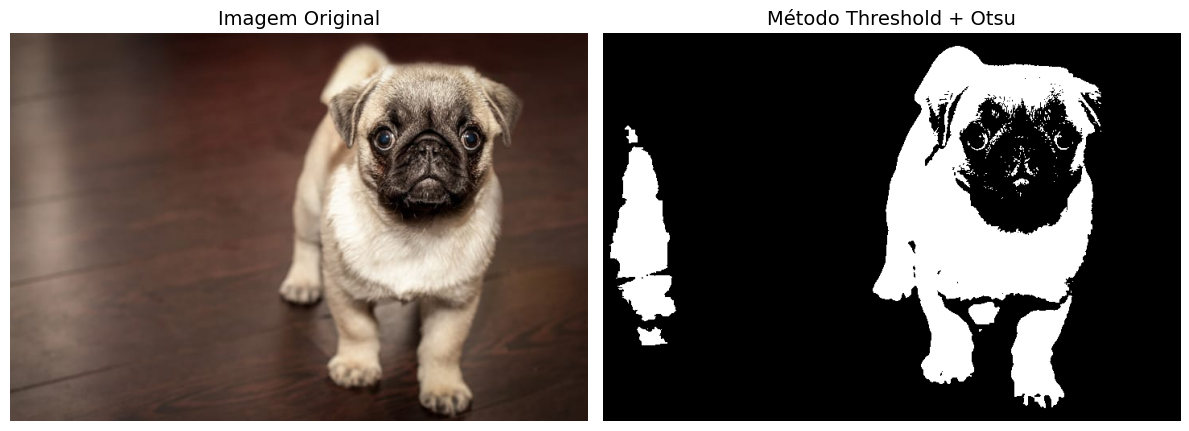

In [15]:
# Visualizando resultado da segmentação
plot_results(img_original, segmentation, title_method="Método Threshold + Otsu", src="threshold_otsu")

## 📌5. Conclusão

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">Embora sejam processos distintos, a detecção de bordas e a segmentação frequentemente se complementam em aplicações de processamento de imagens. As bordas detectadas podem ser utilizadas como uma etapa preliminar na segmentação, ajudando a definir claramente os limites dos objetos. Juntas, elas são componentes essenciais para a interpretação e análise de imagens digitais em variados campos da ciência e tecnologia.</p>